<a href="https://colab.research.google.com/github/syma-afsha/AI_LAB/blob/main/Practice_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [24]:
X_train=pd.read_csv('/content/train.csv')
X_test=pd.read_csv('/content/test.csv')
X_train.head()
t_train = X_train.iloc[:, -1].values  # Last column
X_train = X_train.iloc[:, :-1].values  # First 5 columns

X_test = X_test.values



In [25]:
X_train[:4]

array([[ 21.9892912 ,  67.4374412 ,  47.1311893 , 180.0403746 ,
        112.60746958],
       [ 18.42425136,  51.31641885,  38.67197441, 141.12722957,
         86.56046455],
       [  7.09282124,  19.71872767,  13.9602527 ,  53.11634537,
         32.57895749],
       [ 25.80850069,  70.95496001,  47.67076436, 192.02799882,
        121.31963509]])

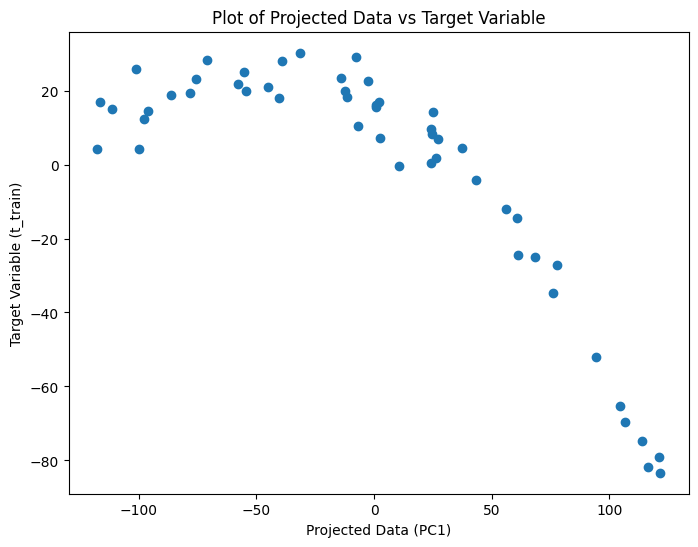

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# PCA Function
def PCA(X, num_components):
    """
    Perform PCA according to the steps in the image:
    1. Compute the mean of the data.
    2. Compute the covariance matrix.
    3. Get the top M eigenvalues and eigenvectors.
    4. Project the data onto the principal components.

    Parameters:
        X (numpy.ndarray): Input data of shape (n_samples, n_features).
        num_components (int): Number of principal components to retain.

    Returns:
        projected_data (numpy.ndarray): Data projected onto the principal components.
        eigenvalues (numpy.ndarray): Top M eigenvalues.
        eigenvectors (numpy.ndarray): Corresponding eigenvectors.
        reconstructed_data (numpy.ndarray): Reconstructed data from the projection.
    """
    # Step 1: Calculate the mean of the data

    X_mean = np.mean(X, axis=0)  # Mean of each feature (D-dimensional)
    X_centered = X - X_mean  # Center the data

    # Step 2: Compute the covariance matrix
    n_samples = X.shape[0]
    covariance_matrix = (1 / n_samples) * np.dot(X_centered.T, X_centered)

    # Step 3: Get the eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

    # Step 4: Sort eigenvalues and eigenvectors in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]


    # Step 5: Select the top 'num_components' eigenvalues and eigenvectors
    top_eigenvalues = eigenvalues[:num_components]
    top_eigenvectors = eigenvectors[:, :num_components]

    # Step 6: Project the data onto the principal components
    projected_data = np.dot(X_centered, top_eigenvectors)


    # # Step 7: Reconstruct the original data from the projection
    # reconstructed_data = np.dot(projected_data, top_eigenvectors.T) + X_mean


    return projected_data, top_eigenvalues, top_eigenvectors


data_1d=PCA(X_train,1)

# Plot the 2D data
plt.figure(figsize=(8, 6))
# Access the projected data (first element of the tuple)
data = data_1d[0]
plt.scatter(data,t_train)

plt.xlabel("Projected Data (PC1)")
plt.ylabel("Target Variable (t_train)")
plt.title("Plot of Projected Data vs Target Variable")
plt.show()

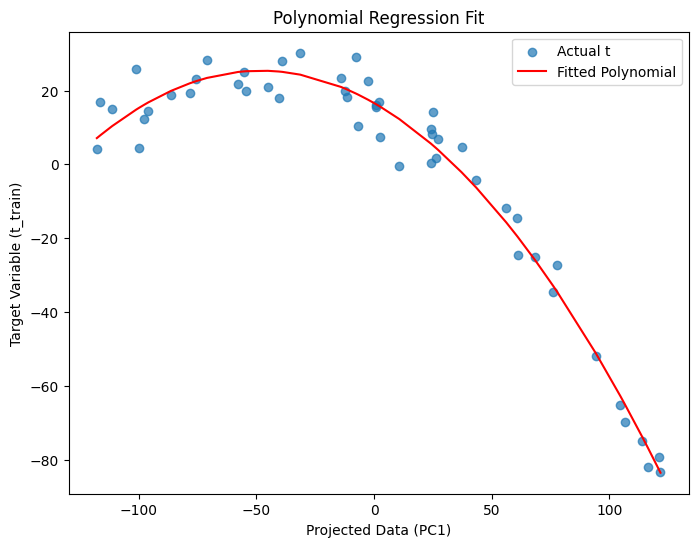

Prediction Uncertainty (MSE): 27.73263855455691


In [38]:
degree = 2
coefficients = np.polyfit(data.flatten(), t_train, degree)
polynomial = np.poly1d(coefficients)

# Predicted values
t_pred_train = polynomial(data.flatten())

# Plot predictions
plt.figure(figsize=(8, 6))
plt.scatter(data, t_train, alpha=0.7, label='Actual t')
plt.plot(np.sort(data.flatten()), polynomial(np.sort(data.flatten())), color='red', label='Fitted Polynomial')
plt.xlabel("Projected Data (PC1)")
plt.ylabel("Target Variable (t_train)")
plt.title("Polynomial Regression Fit")
plt.legend()
plt.show()

# Calculate uncertainty (Mean Squared Error)
uncertainty = np.mean((t_train - t_pred_train) ** 2)
print("Prediction Uncertainty (MSE):", uncertainty)


Predicted values for test data: [-40.88314227 -63.12959071  20.31358135   9.65461241  17.19614313
  -9.60731927  25.33031272  -7.15042448 -21.15482323 -31.39491612]


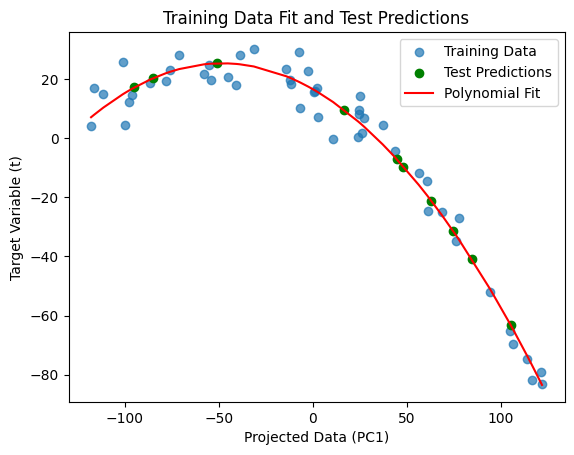

Range of training targets (t_train): (-83.31955564169027, 30.227357488394)
Range of test predictions (t_pred_test): (-63.12959071146158, 25.330312720132113)


In [43]:
X_test_centered = X_test - np.mean(X_train, axis=0)
data_test_1d = np.dot(X_test_centered, data_1d[2])

t_pred_test = polynomial(data_test_1d.flatten())
print("Predicted values for test data:", t_pred_test)

plt.scatter(data, t_train, alpha=0.7, label='Training Data')
plt.scatter(data_test_1d, t_pred_test, color='green', label='Test Predictions')
plt.plot(np.sort(data.flatten()), polynomial(np.sort(data.flatten())), color='red', label='Polynomial Fit')
plt.xlabel("Projected Data (PC1)")
plt.ylabel("Target Variable (t)")
plt.title("Training Data Fit and Test Predictions")
plt.legend()
plt.show()

# print("Range of training targets (t_train):", (np.min(t_train), np.max(t_train)))
# print("Range of test predictions (t_pred_test):", (np.min(t_pred_test), np.max(t_pred_test)))


Expected variance of the distribution: 9


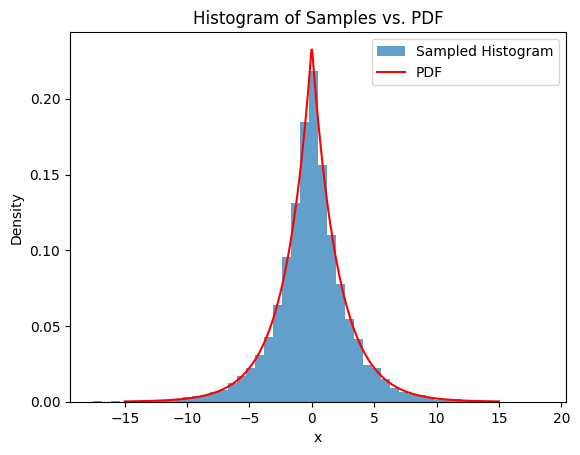

Lambda: 1, Sample Variance: 0.9811816942865255, Expected Variance: 1
Lambda: 2, Sample Variance: 3.924726777146102, Expected Variance: 4
Lambda: 3, Sample Variance: 8.83063524857873, Expected Variance: 9


In [47]:
import numpy as np
import matplotlib.pyplot as plt

# # (a) Normalization Constant A
# # The integral of p(x) over all x must equal 1
# # A = 1 / (integral of the rest of the function over all x)
# def normalization_constant(lambda_val):
#     return 1 / (2 * lambda_val / np.sqrt(2))

# lambda_value = 3
# A_value = normalization_constant(lambda_value)
# print("Normalization constant A:", A_value)

# # (b) Mean of the Distribution
# # The mean of the given distribution is \mu, as the distribution is symmetric around \mu
# mu_value = 0  # Given
# print("Mean of the distribution:", mu_value)

# (c) Variance of the Distribution
# The variance of the given distribution is \lambda^2
lambda_value = 3
expected_variance = lambda_value ** 2
print("Expected variance of the distribution:", expected_variance)

# (d) Sampling the Distribution
np.random.seed(42)
num_samples = 10000

u1 = np.random.uniform(0, 1, num_samples)
u2 = np.random.uniform(0, 1, num_samples)
s = np.where(u1 < 0.5, 1, -1)
samples = s * lambda_value * np.log(u2) / np.sqrt(2)

# Plot histogram
plt.hist(samples, bins=50, density=True, alpha=0.7, label='Sampled Histogram')

# Overlay PDF
x_values = np.linspace(-15, 15, 500)
pdf_values = A_value * np.exp(-np.sqrt(2) * np.abs(x_values - mu_value) / lambda_value)
plt.plot(x_values, pdf_values, color='red', label='PDF')
plt.xlabel('x')
plt.ylabel('Density')
plt.title('Histogram of Samples vs. PDF')
plt.legend()
plt.show()

# (e) Verify Variance for Different Lambda Values
lambda_values = [1, 2, 3]
for lambda_val in lambda_values:
    A_val = 1 / (2 * lambda_val / np.sqrt(2))
    samples = s * lambda_val * np.log(u2) / np.sqrt(2)
    sample_variance = np.var(samples)
    print(f"Lambda: {lambda_val}, Sample Variance: {sample_variance}, Expected Variance: {lambda_val ** 2}")
